In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [ ]:
pickleFile = open("hw3_p1.pkl","rb")
data = pd.read_pickle(pickleFile)
#data

In [ ]:
x_train = data["x_train"]
x_test = data["x_test"]

y_train = data["y_train"]
y_test = data["y_test"]

In [ ]:
def kernel(u, v):
    return (np.dot(u.T, u)) * (np.dot(v.T, v))

In [ ]:
def knn(x_train, y_train, x_test, y_test, K, distance_func):
    predictions = []
    for x_t in x_test:
        if distance_func == 'euclidean':
            distances = np.sqrt(np.sum((x_train - x_t)**2, axis=1))
        else:
            distances = np.sqrt(np.abs(kernel(x_t, x_t) + np.sum(x_train**2, axis=1) - 2 * np.dot(x_train, x_t)))
        k_neighbors_indices = np.argsort(distances)[:K]
        k_neighbor_labels = y_train[k_neighbors_indices]
        most_common_label = Counter(k_neighbor_labels).most_common(1)[0][0]
        predictions.append(most_common_label)
    accuracy = np.mean(np.array(predictions) == y_test)
    return accuracy

In [ ]:
K_values = list(range(1, 26))
euclidean_accuracies = []
kernelized_accuracies = []

for K in K_values:
    euclidean_accuracies.append(knn(x_train, y_train, x_test, y_test, K, 'euclidean'))
    kernelized_accuracies.append(knn(x_train, y_train, x_test, y_test, K, 'kernelized'))

fields = ["K", "Euclidean Accuracy", "Kernelized Accuracy"]
table = PrettyTable()
table.field_names = fields
for K, ea, ka in zip(K_values, euclidean_accuracies, kernelized_accuracies):
    table.add_row([K, f"{ea:.3f}", f"{ka:.3f}"])
print(table)

+----+--------------------+---------------------+
| K  | Euclidean Accuracy | Kernelized Accuracy |
+----+--------------------+---------------------+
| 1  |       0.770        |        0.594        |
| 2  |       0.770        |        0.594        |
| 3  |       0.812        |        0.610        |
| 4  |       0.806        |        0.608        |
| 5  |       0.824        |        0.604        |
| 6  |       0.820        |        0.618        |
| 7  |       0.820        |        0.622        |
| 8  |       0.816        |        0.618        |
| 9  |       0.816        |        0.604        |
| 10 |       0.820        |        0.594        |
| 11 |       0.822        |        0.594        |
| 12 |       0.836        |        0.588        |
| 13 |       0.832        |        0.596        |
| 14 |       0.834        |        0.594        |
| 15 |       0.824        |        0.600        |
| 16 |       0.824        |        0.596        |
| 17 |       0.826        |        0.590        |


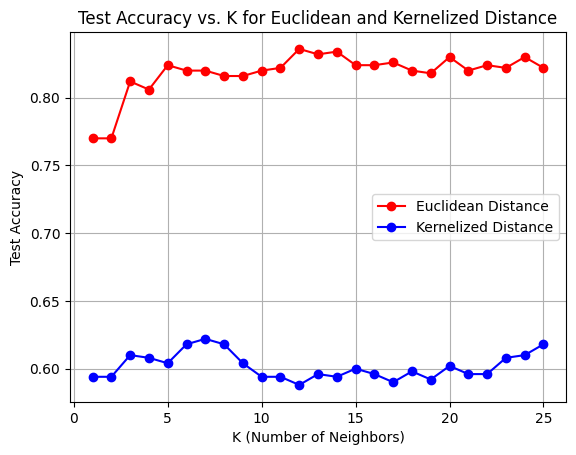

In [ ]:
plt.plot(K_values, euclidean_accuracies, marker='o', linestyle='-', color='red', label='Euclidean Distance')
plt.plot(K_values, kernelized_accuracies, marker='o', linestyle='-', color='blue', label='Kernelized Distance')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. K for Euclidean and Kernelized Distance')
plt.legend()
plt.grid(True)
plt.show()